# Using qt3qutipsandbox to Evaluate Ensemble NV Spectra

Consider an ensemble of $NV^-$ centers in diamond, all randomly aligned in a possible of four orientations according to the diamond lattice (fig. 1). The vast majority of nitrogen atoms are the N-14 isotope, which has a quantum spin number of 1. What does the transition spectrum of this ensemble look like under the effects of power broadening?

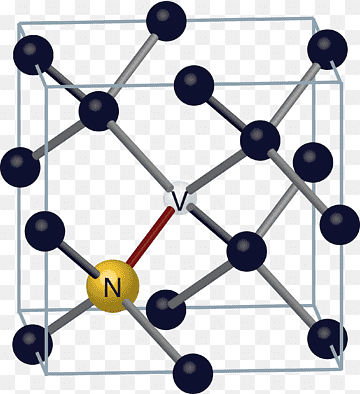

<center>Fig. 1: Nitrogen-vacancy center in a diamond lattice</center>

In [2]:
from spectra.nv_ground_state import *

# Set up initial state


First we set up the initial state of our system. As a common example, let us assume that the NV centers have been spin polarized such that all of their electron spins are ms = 0. 

The "initial state" in this program is given as an array of 9 values. It references the probability of finding an NV center of a particular eigenstate out of a series of NV centers, and is thus NOT equivalent to the state vector of an ensemble of NV centers. This semi-classical treatment of quantum mechanics is appropriate under the assumption that we have a vast number of NV centers. 

The initial state is an ordered list corresponding to a series of 9 eigenstates, increasing in energy level (see fig. 2 for details). 

In [2]:
initial_state = [1/3, 1/3, 1/3, 0, 0, 0, 0, 0, 0] # Initial distribution of population per eigenstate 

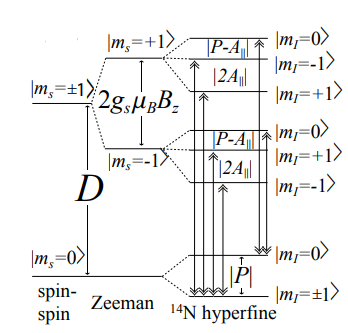

<center>Fig. 2: Energy levels in an NV center (taken from Acosta 2011)</center>

# Build static magnetic field vector and oscillating magnetic field vector

The static magnetic field vector cuts degeneracy in the spin +-1 energy levels of the NV center electron. The oscillating magnetic field vector is induced by an applied RF wave, and is used to drive state transitions.

In [3]:
static_bvec = 0.005 * np.array([0.4, 0.1, -0.2]) # Applied static magnetic field in Tesla
transition_bvec = np.array([0., 0, 1.E-4]) # RF field vector, for transition amplitudes

t# Build parameters

NVGroundParameters14N() is a dataclass containing necessary values such as hyperfine parameters and spin numbers. Hamiltonians, energies, and eigenstates are all calculated within the plot commands. 

The ground Hamiltonian is taken from Doherty et a., Physics Reports 528 (2013) to be

$H = D_{gs}\Bigg[\hat{S_{z}^{2}} - S(S+1)\Bigg] + A_{gs}^{||}\hat{S_{z}}\hat{I_{z}} + A_{gs}^{\perp}\Bigg[\hat{S_{x}}\hat{I_{x}} + \hat{S_{y}}\hat{I_{y}}\Bigg] + P_{gs}\Bigg[\hat{I_{z}^{2}} - I(I+1)/3\Bigg]$

and describes the interaction between the NV electronic spin and nitrogen nuclear spin configured in a diamond lattice. S and I are the electronic and nuclear spin numbers respectively, $D_{gs}$ is the fine structure splitting, $A_{gs}^{||}$ and $A_{gs}^{\perp}$ are the axial and non-axial magnetic hyperfine parameters, and $P_{gs}$ is the nuclear electric quadrupole parameter. All are included in NVGroundParameters14N().

The Zeeman Hamiltonian gives the Zeeman interaction for both the NV electronic and nuclear spins.

$H = \gamma_{e}\boldsymbol{B_0}\bullet \boldsymbol{S_0} + \gamma_{n}\boldsymbol{B_0}\bullet \boldsymbol{I_0}$

where $\boldsymbol{B_0}$ is the static magnetic field vector, and $\gamma_{e}$ and $\gamma_{n}$ are the electron and nuclear gyromagnetic ratios. 

The transition Hamiltonian looks identical, but in this case our magnetic field vector is the transition_bvec previously defined. Here, we only use the transition Hamiltonian to find the *amplitude* of the transition energy-- thus, the transient properties of the RF-wave induced magnetic field can be ignored. We do not use the transition Hamiltonian to examine the effects of time dependence so this treatment is appropriate.

In [4]:
p = NVGroundParameters14N()

# Plot the spectrum

The signal strength examined for an NV center during CW-ODMR is proportional to the probability of seeing a state transition. The probability for a state transition under the effect of a static and transient magnetic field is given as:

$P = \sin^2{(\sqrt{\Omega^2+(f-f_0)^2}*t)}*\frac{1}{1 + (\frac{f-f_0}{\Omega})^2}$

where $\Omega$ is the transition amplitude or "Rabi frequency," f is the applied frequency during CW-ODMR and $f_0$ is the resonant transition frequency. Note the Lorentzian behavior. However, here we simplify the equation to:

$P = \frac{\Omega}{1 + (\frac{f-f_0}{\Omega})^2}$

in order to strictly examine the qualitative behavior of a spectrum without considering ODMR pulse length. 

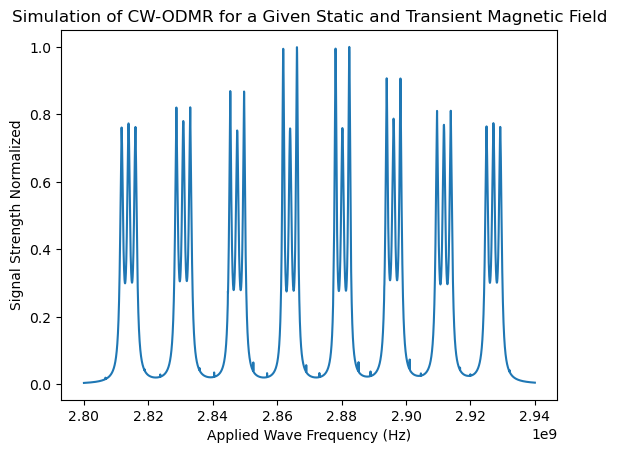

In [5]:
frequencies = np.linspace(2.8E9, 2.94E9, num=2**16) # Line space of frequencies to plot across
spectrum = get_power_broadened_spectrum_nv_axis_average(frequencies, transition_bvec, static_bvec, initial_state) 
spectrum = spectrum/max(spectrum) # Normalize spectrum to max value of 1 

# Plot
fig = plt.plot(frequencies, spectrum)
plt.xlabel("Applied Wave Frequency (Hz)")
plt.ylabel("Signal Strength Normalized")
plt.title("Simulation of CW-ODMR for a Given Static and Transient Magnetic Field")
plt.show()

# Analysis of the spectrum

Here we see a total of 8 groups: 2 groups for all 4 possible NV configurations. Within each grouping, the hyperfine splitting can be seen. This matches our expectation, as the static magnetic field has significant off-axis components relative to all NV configurations. We can compare it to fig 3 from Acosta 2011, which provides an example of CW-ODMR for ensemble NV centers for a static magnetic field with significant off-axis contributions for all configurations. Acosta provides magnetic field magnitude but not orientation, so here we make a qualiative comparison. Regardless, our results match the expected splitting behavior and the correct number of peaks.

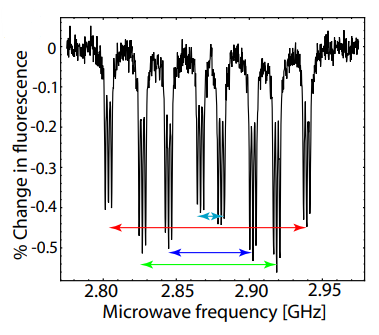

<center>Fig. 3: Example of CW-ODMR from Acosta 2011</center>

# We can also use use this tool to examine single NV centers

Similar to the first example, let us consider an initial state where the electron spin has been polarized to ms = 0. The NV-axis is assumed to be along the z-axis and the magnetic field vectors are defined in this coordinate system.

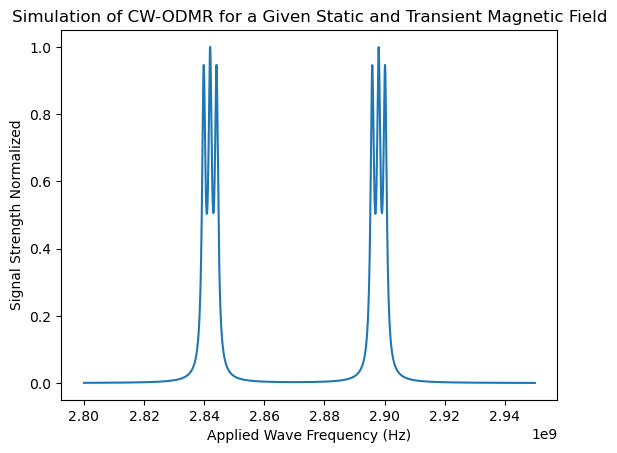

In [7]:
initial_state = [1/3, 1/3, 1/3, 0, 0, 0, 0, 0, 0] # Initial distribution of population per eigenstate 

static_bvec = 0.001 * np.array([0, 0, 1]) # Applied static magnetic field in Tesla
transition_bvec = np.array([0, 1.E-4, 1.E-4]) # RF field vector, for transition amplitudes

p = NVGroundParameters14N() # NV parameters

frequencies = np.linspace(2.8E9, 2.95E9, num=2**12) # Line space of frequencies to plot across
spectrum = get_power_broadened_spectrum(frequencies, transition_bvec, static_bvec, initial_state) 
spectrum = spectrum/max(spectrum) # Normalize spectrum to max value of 1 

# Plot
fig = plt.plot(frequencies, spectrum)
plt.xlabel("Applied Wave Frequency (Hz)")
plt.ylabel("Signal Strength Normalized")
plt.title("Simulation of CW-ODMR for a Given Static and Transient Magnetic Field")
plt.show()

# Analysis of the spectrum

For a small static magnetic field parallel to the NV-axis, the Zeeman splitting has a simple proportionality relation to the magnetic field magnitude:

$\Delta f = 2D_{gs}B$

Which in our case is:

$\Delta f = 5.74e7$

which is roughly correct for our presented graph.

# Curve fitting with scipy

We can also use qt3qutipsandbox for curve fitting ODMR spectra. Let us examine some manufatured data to demonstrate the fit commands.

In [6]:
from curve_fit import annealing # You may need to pip install this package

In [17]:
# Parameters
static_bvec = 0.005 * np.array([0.4, 0.1, -0.2])
transition_bvec = np.array([0., 0., 1.E-4])
initial_state = [1 / 3., 1 / 3., 1 / 3., 0, 0, 0, 0, 0, 0]
frequencies = np.linspace(2.8E9, 2.94E9, num=2**16)

# Spectrum
spectrum = get_power_broadened_spectrum_nv_axis_average(frequencies, transition_bvec, static_bvec, initial_state)

# Manufature noisy data
frequenciesb = np.linspace(2.8E9, 2.94E9, num=600)  # Decreased resolution
spectrum = get_power_broadened_spectrum_nv_axis_average(frequenciesb, transition_bvec, [0.002, 0.0005, -0.001], initial_state)
noise = np.random.normal(0, 0.01, 600)  # Added noise
spectrum = spectrum + noise

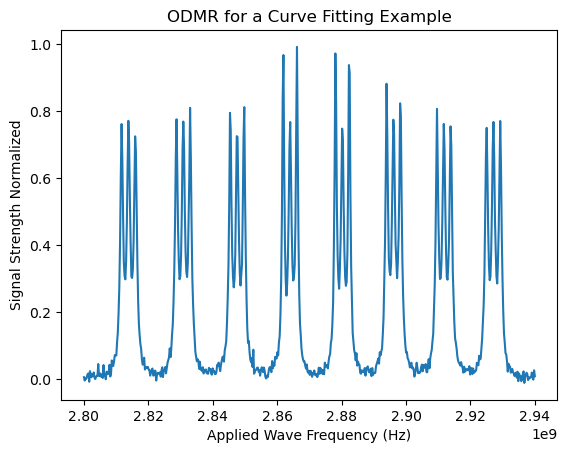

In [14]:
# Plot
fig = plt.plot(frequenciesb, spectrum)
plt.xlabel("Applied Wave Frequency (Hz)")
plt.ylabel("Signal Strength Normalized")
plt.title("ODMR for a Curve Fitting Example")
plt.show()

The curve fitting process we will use requires two inputs: an array of all peak locations (these can be grabbed from you data manually or automatically), and the average FWHM of all peaks. The average can be a rough estimate-- it is not the important value here, and is determined by our transient magnetic field as opposed to our static magnetic field (the value of interest). Our inputs act as an initial guess for our curve fitter to work with. In cases with many local minima like ours, curve fitting is quite difficult, and the more accurate your array of resonant frequencies the more accurate your fit will be.

In [5]:
localmax = np.array([2.8118E9, 2.8139E9, 2.8161E9, 2.8287E9, 2.8309E9, 2.8331E9,
                     2.8454E9, 2.8476E9, 2.8498E9, 2.8619E9, 2.8640E9, 2.8662E9,
                     2.8780E9, 2.8802E9, 2.8823E9, 2.8942E9, 2.8961E9, 2.8982E9,
                     2.9096E9, 2.9118E9, 2.9139E9, 2.9250E9, 2.9271E9, 2.9294E9])

In [6]:
guess = get_guess(localmax, 6.E5) # This formats our initial guess for the curve fitting process
                                  # localmax are the resonant frequencies, and the second number is the FWHM average

In [7]:
bounds_in = get_bounds(guess, 1.E4, 6.E5) # Puts bounds on the amount the curve fitter can deviate from your guess
                                          # The tighter the bounds, the faster the run time

In [8]:
minimizer_kwargs = {"method": "L-BFGS-B"} # Minimization algorithm, see scipy documentation

In [9]:
result = annealing.curve_fit(lorentz_lineshape_fit, frequencies, spectrum, x0=guess, bounds=bounds_in, maxiter=1000)
# The curve fitter. lorentz_lineshape_fit is the default and should not be changed.

[2.81179008e+09 2.81389005e+09 2.81609009e+09 2.82870998e+09
 2.83089017e+09 2.83309010e+09 2.84540993e+09 2.84759082e+09
 2.84979000e+09 2.86190976e+09 2.86401000e+09 2.86619011e+09
 2.87800998e+09 2.88020986e+09 2.88230998e+09 2.89419002e+09
 2.89611000e+09 2.89820996e+09 2.90960981e+09 2.91179011e+09
 2.91389690e+09 2.92499053e+09 2.92710992e+09 2.92939005e+09
 4.88476546e+05 4.83852432e+05 4.70544993e+05 4.86962373e+05
 4.87479331e+05 4.79841228e+05 4.77940780e+05 4.70314007e+05
 4.75890568e+05 6.07432024e+05 4.28996467e+05 5.02897206e+05
 5.04182108e+05 4.52503447e+05 5.13332920e+05 5.01571128e+05
 4.59477529e+05 5.02675257e+05 4.82229994e+05 4.78672119e+05
 4.76054762e+05 4.76771056e+05 4.88356372e+05 4.78936325e+05]


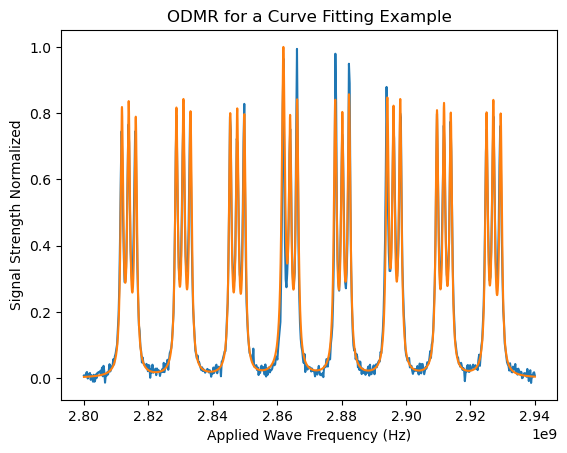

In [19]:
# Results/plotting
print(result.x)
frequencies = np.linspace(2.8E9, 2.94E9, num=2 ** 16)
fig1 = plt.plot(frequenciesb, spectrum)
fig2 = plt.plot(frequencies, lorentz_lineshape_fit(frequencies, result.x))
plt.xlabel("Applied Wave Frequency (Hz)")
plt.ylabel("Signal Strength Normalized")
plt.title("ODMR for a Curve Fitting Example")
plt.show()

In this example, our fit is not the most useful as our original data was very nice. In cases where there is more noise or when the data has lower resoltution, this fit code should come in handy!

# Finding the static magnetic field

